In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary Cleaned.csv')

In [3]:
df.head()

,Id,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,avg_salary,Company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,0,Data Scientist,$76K-$111K (Glassdoor est.),"At Varen, our performance is measured by the s...",4.2,Varen Technologies\n4.2,"Annapolis Junction, MD","Columbia, MD",51 to 200 employees,2005,...,93.5,Varen Technologies\n,MD,0,15,0,0,0,0,0
1,1,Data Scientist,$108K-$145K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,126.5,ManTech\n,VA,0,52,0,0,0,0,0
2,2,Data Scientist,$72K-$120K (Glassdoor est.),Join Our Growing Team\nA career with A Place f...,3.1,A Place for Mom\n3.1,"Overland Park, KS","New York, NY",501 to 1000 employees,2000,...,96.0,A Place for Mom\n,KS,0,20,1,0,0,1,1
3,4,Data Scientist,$75K-$100K (Glassdoor est.),New England Biolabs is seeking a Data Scientis...,4.7,New England Biolabs\n4.7,"Ipswich, MA","Ipswich, MA",201 to 500 employees,1974,...,87.5,New England Biolabs\n,MA,1,46,1,0,0,0,1
4,5,Data Scientist,$68K-$78K (Glassdoor est.),Preferred Qualifications\nMasters degree or do...,3.6,Amrock\n3.6,"Detroit, MI","Detroit, MI",1001 to 5000 employees,1997,...,73.0,Amrock\n,MI,1,23,1,0,0,0,0


In [4]:
df.columns

Index(['Id', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided Salary', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_sim'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_sim.value_counts()

data scientist    341
data engineer      76
analyst            70
na                 67
mle                31
director           10
manager             8
Name: job_sim, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        411
senior    192
Name: seniority, dtype: int64

In [10]:
df.job_state.value_counts()

 CA    138
 VA     95
 MA     54
 NY     48
 WA     26
 TX     23
 MD     23
 IL     23
 DC     19
 CO     17
 MO     16
 NC     12
 GA     10
 WI      9
 PA      8
 MI      8
 FL      7
 OH      7
 NJ      6
 AL      6
 TN      5
 UT      5
 NE      4
 MS      4
 IN      4
 MN      3
 OK      3
 SC      3
 LA      3
 WV      2
 KY      2
 CT      2
 KS      2
 NM      2
 IA      1
 OR      1
 ME      1
 AZ      1
Name: job_state, dtype: int64

In [11]:
df['job_len'] = df['Job Description'].apply(lambda x: len(x))

In [12]:
df['job_len']

0      3044
1      3490
2      5230
3      2161
4      3342
       ... 
598    3491
599    4188
600    3685
601    2322
602    3503
Name: job_len, Length: 603, dtype: int64

In [13]:
df['Num_Comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [14]:
df['Num_Comp']

0      3
1      0
2      3
3      3
4      0
      ..
598    0
599    0
600    0
601    3
602    3
Name: Num_Comp, Length: 603, dtype: int64

In [15]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.Hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.Hourly ==1 else x.max_salary, axis =1)

In [16]:
df[df.Hourly ==1][['Hourly','min_salary','max_salary']]

,Hourly,min_salary,max_salary
76,1,34,46


In [17]:
df['Company_txt'] = df.Company_txt.apply(lambda x: x.replace('\n', ''))

In [18]:
df['Company_txt']

0               Varen Technologies
1                          ManTech
2                  A Place for Mom
3              New England Biolabs
4                           Amrock
                  ...             
598                     bioMérieux
599                     Quick Base
600    Valiant Integrated Services
601                     UST Global
602                       SendBird
Name: Company_txt, Length: 603, dtype: object

In [19]:
df.describe()

,Id,Rating,Founded,Hourly,Employer Provided Salary,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,job_len,Num_Comp
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,459.434494,3.752239,1867.074627,0.001658,0.003317,87.257048,127.953566,107.572139,0.487562,35.562189,0.663350,0.001658,0.283582,0.301824,0.412935,3903.029851,1.086235
std,300.585719,0.697557,465.972258,0.040723,0.057543,29.196242,36.476741,30.729276,0.500260,42.672601,0.472956,0.040723,0.451111,0.459431,0.492770,1665.338165,1.361255
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,14.000000,38.000000,20.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,375.000000,0.000000
25%,174.500000,3.400000,1959.000000,0.000000,0.000000,68.000000,102.000000,87.750000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2863.000000,0.000000
50%,453.000000,3.800000,1998.000000,0.000000,0.000000,86.000000,124.000000,104.500000,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3711.000000,0.000000
75%,737.000000,4.200000,2008.000000,0.000000,0.000000,108.000000,150.000000,125.750000,1.000000,46.500000,1.000000,0.000000,1.000000,1.000000,1.000000,4721.500000,3.000000
max,997.000000,5.000000,2019.000000,1.000000,1.000000,176.000000,278.000000,227.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18555.000000,3.000000


In [20]:
df.columns

Index(['Id', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided Salary', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_sim', 'seniority',
       'job_len', 'Num_Comp'],
      dtype='object')

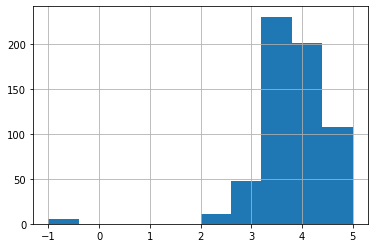

In [21]:
df.Rating.hist()

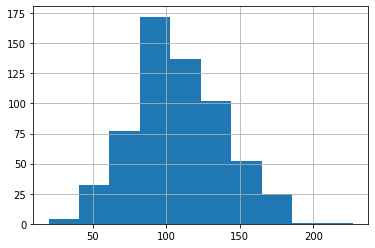

In [22]:
df.avg_salary.hist()

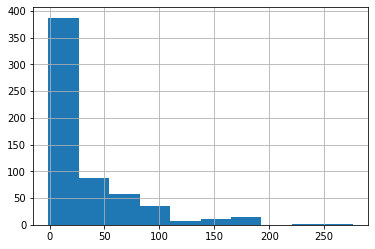

In [23]:
df.age.hist()

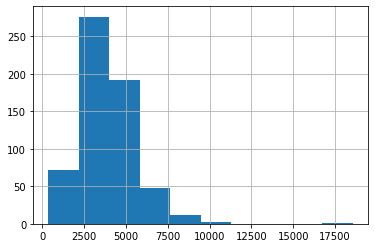

In [24]:
df.job_len.hist()

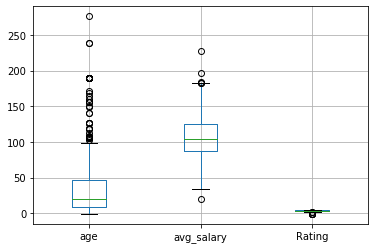

In [25]:
df.boxplot(column = ['age', 'avg_salary','Rating'])

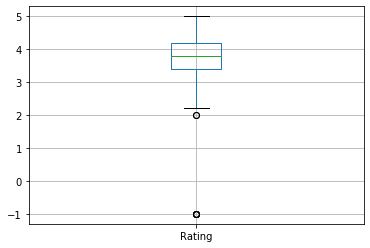

In [26]:
df.boxplot(column = 'Rating')

In [27]:
df[['age','avg_salary','Rating','job_len']].corr()

,age,avg_salary,Rating,job_len
age,1.000000,-0.186781,-0.024387,0.131428
avg_salary,-0.186781,1.000000,0.112137,0.013529
Rating,-0.024387,0.112137,1.000000,-0.002496
job_len,0.131428,0.013529,-0.002496,1.000000


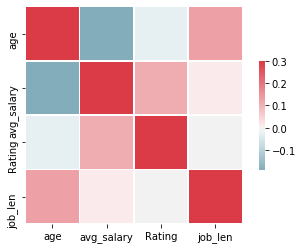

In [28]:
cmap = sns.diverging_palette(220 , 10, as_cmap = True)
sns.heatmap(df[['age','avg_salary','Rating','job_len']].corr(), vmax = 0.3, center = 0, cmap = cmap, square = True, linewidths = 0.5,
           cbar_kws = {"shrink": 0.5})

In [29]:
df.columns

Index(['Id', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided Salary', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_sim', 'seniority',
       'job_len', 'Num_Comp'],
      dtype='object')

In [30]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
            'spark', 'aws', 'excel', 'job_sim', 'seniority']]

graph for Location: total = 162


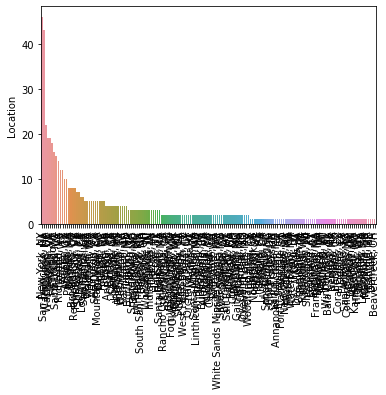

graph for Headquarters: total = 171


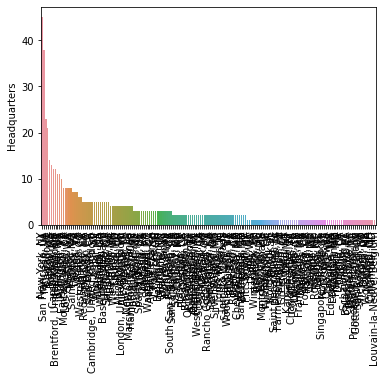

graph for Size: total = 9


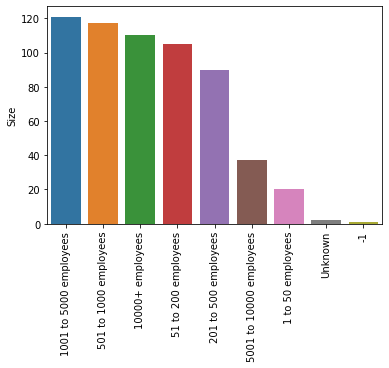

graph for Type of ownership: total = 11


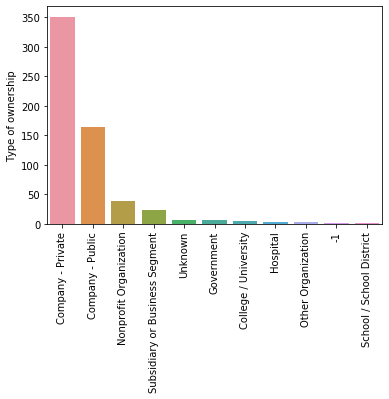

graph for Industry: total = 50


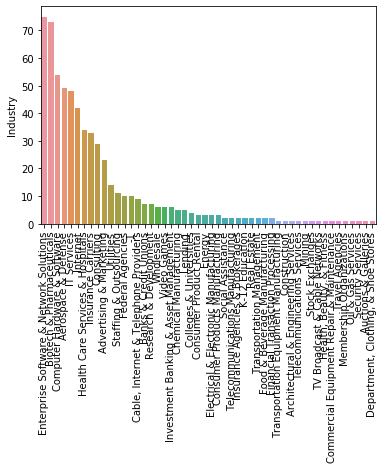

graph for Sector: total = 22


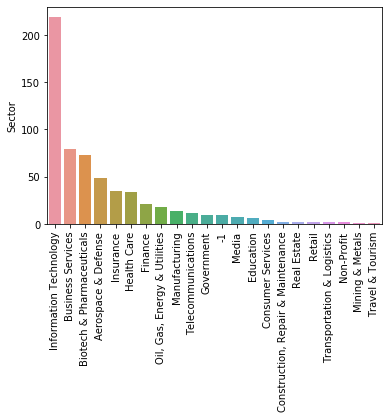

graph for Revenue: total = 14


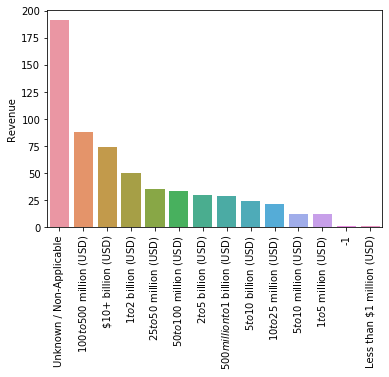

graph for Company_txt: total = 302


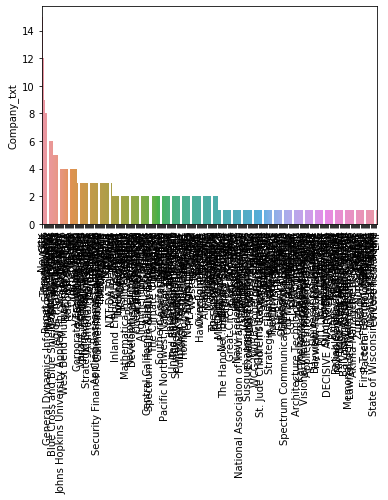

graph for job_state: total = 38


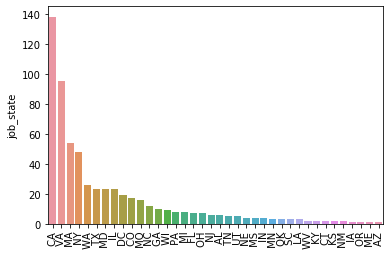

graph for same_state: total = 2


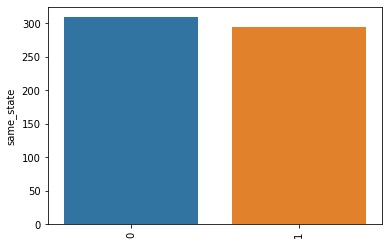

graph for python_yn: total = 2


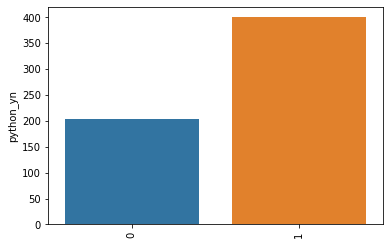

graph for R_yn: total = 2


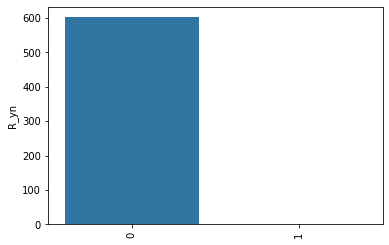

graph for spark: total = 2


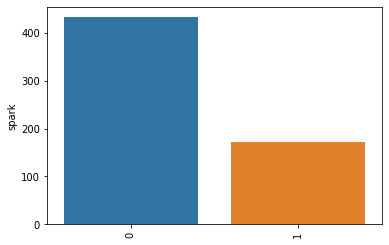

graph for aws: total = 2


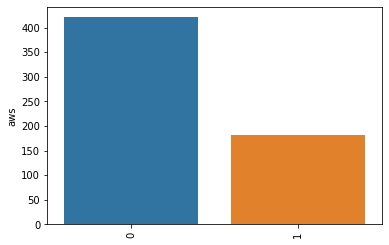

graph for excel: total = 2


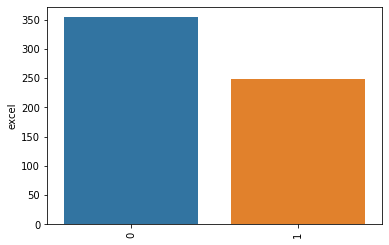

graph for job_sim: total = 7


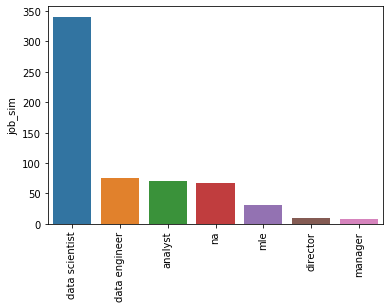

graph for seniority: total = 2


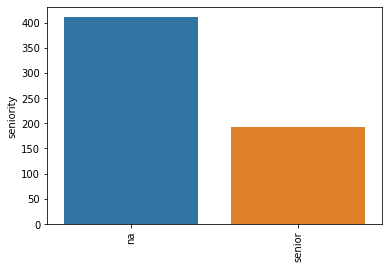

In [31]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [32]:
pd.pivot_table(df, index = 'job_sim', values = 'avg_salary')

,avg_salary
job_sim,
analyst,78.671429
data engineer,106.322368
data scientist,114.359238
director,113.850000
manager,106.562500
mle,123.483871
na,96.462687


In [33]:
pd.pivot_table(df, index = ['job_sim','seniority'], values = 'avg_salary')

avg_salary
job_sim        seniority            
analyst        na          61.636364
               senior      93.864865
data engineer  na          99.215686
               senior     120.820000
data scientist na         105.215768
               senior     136.395000
director       na         113.850000
manager        na         103.571429
               senior     127.500000
mle            na         117.407407
               senior     164.500000
na             na          83.773810
               senior     117.780000

In [34]:
pd.pivot_table(df, index = ['job_state','job_sim'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_sim                   
 WV       data scientist   63.500000
 WI       na               52.000000
          data scientist   91.333333
          analyst          59.000000
 WA       data scientist  117.250000
...                              ...
 CA       mle             150.281250
          na               80.964286
          data engineer   130.029412
 AZ       data scientist  110.500000
 AL       data scientist   95.166667

[98 rows x 1 columns]

In [35]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [36]:
pd.pivot_table(df, index = ['job_state','job_sim'], values = 'avg_salary',
               aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_sim                   
 WV       data scientist           2
 WI       na                       2
          data scientist           3
          analyst                  4
 WA       data scientist          14
          data engineer            4
          analyst                  8
 VA       data scientist          49
          analyst                  3
          data engineer           18
          mle                      7
          na                      18
 UT       data scientist           3
          data engineer            2
 TX       data scientist          13
          data engineer            7
          analyst                  3
 TN       na                       1
          data scientist           3
          data engineer            1
 SC       analyst                  3
 PA       data scientist           2
          analyst                  5
          na                       1
 OR       data scientist           1
 OK       na                       2
          analyst                  1
 OH       na                       1
          mle                      1
          data scientist           3
          analyst                  2
 NY       data scientist          34
          analyst                  5
          data engineer            1
          director                 2
          manager                  2
          mle                      2
          na                       2
 NM       data scientist           2
 NJ       data scientist           4
          analyst                  2
 NE       data scientist           2
          analyst                  2
 NC       director                 3
          data scientist           5
          data engineer            4
 MS       na                       4
 MO       na                       2
          data scientist          10
          data engineer            2
          analyst                  2
 MN       data scientist           3
 MI       manager                  2
          data scientist           6
 ME       analyst                  1
 MD       na                       1
          data scientist          22
 MA       data scientist          32
          analyst                  5
          data engineer            4
          mle                      1
          na                      12
 LA       data engineer            2
          analyst                  1
 KY       data scientist           2
 KS       data scientist           2
 IN       data scientist           2
          data engineer            2
 IL       mle                      3
          data engineer            2
          na                       5
          data scientist          13
 IA       data engineer            1
 GA       na                       1
          data scientist           5
          data engineer            4
 FL       na                       1
          data scientist           2
          data engineer            2
          analyst                  2
 DC       data engineer            1
          data scientist          14
          analyst                  4
 CT       analyst                  1
          data scientist           1
 CO       mle                      1
          data scientist           8
          data engineer            2
          analyst                  6
 CA       manager                  4
          data scientist          72
          director                 5
          analyst                 10
          mle                     16
          na                      14
          data engineer           17
 AZ       data scientist           1
 AL       data scientist           6

In [37]:
pd.pivot_table(df[df.job_sim == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,133.423611
CT,126.000000
CO,125.250000
UT,125.166667
IN,123.000000
MA,119.562500
NJ,118.625000
WA,117.250000
NY,116.691176


In [38]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Num_Comp', 'Hourly', 'Employer Provided Salary', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [39]:
df.columns

Index(['Id', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided Salary', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_sim', 'seniority',
       'job_len', 'Num_Comp'],
      dtype='object')

In [40]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.5    132.209677
 4.8    129.500000
 3.8    120.122222
 3.5    119.485294
 2.8    119.250000
 4.7    117.029412
 2.9    113.583333
 5.0    113.437500
-1.0    112.800000
 2.0    111.500000
 4.6    110.590909
 4.1    109.657143
 4.2    109.326087
 3.0    105.861111
 3.9    105.386792
 3.3    104.291667
 4.0    104.022727
 2.6    103.857143
 3.6    102.483051
 3.1    102.100000
 3.7    100.972973
 3.2    100.820000
 4.3    100.478261
 4.4     98.833333
 4.9     96.000000
 3.4     95.549020
 2.7     90.500000
 2.2     82.666667
 2.5     72.666667
 2.4     71.000000
Industry
                                           avg_salary
Industry                                             
Stock Exchanges                            140.000000
Investment Banking & Asset Management      139.166667
Travel Agencies                            137.500000
Internet                                   135.976190
TV Broadcast & Cable Networks              130.00000

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [41]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),18.0,32.0
$1 to $5 million (USD),2.0,10.0
$10 to $25 million (USD),6.0,16.0
$10+ billion (USD),27.0,47.0
$100 to $500 million (USD),28.0,60.0
$2 to $5 billion (USD),14.0,16.0
$25 to $50 million (USD),10.0,25.0
$5 to $10 billion (USD),7.0,17.0
$5 to $10 million (USD),2.0,10.0


In [42]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
df.to_csv('final data.csv')